# 3. Loops, Program Syntax, and Miscellany 

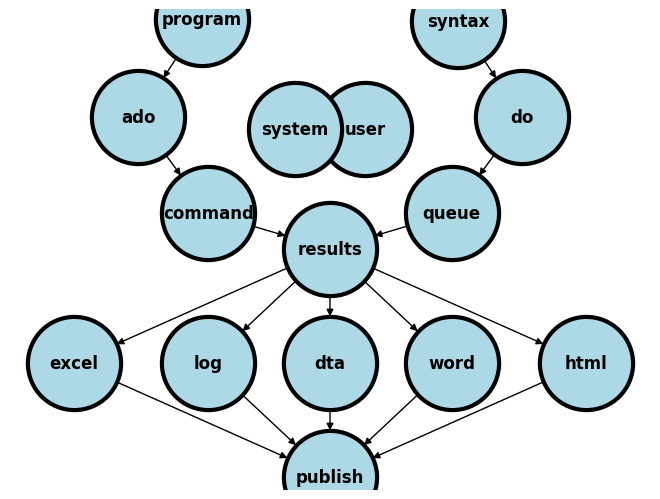

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#import numpy as np
#import sklearn as skl
# 

#plt.figure(figsize=[2, 2])
G = nx.DiGraph()
G.add_node("user",  pos = (550,500) )
G.add_node("system",  pos = (-550,500) )
G.add_node("program",  pos = (-2000, 960) )
G.add_node("syntax",  pos = (2000, 950) )
G.add_node("ado", pos = (-3000, 550) )
G.add_node("do", pos = (3000, 550) )
G.add_node("command", pos = (-1900, 150) )
G.add_node("queue", pos = (1900, 150) )
G.add_node("results", pos = (0,0))
G.add_node("dta", pos = (0, -475))
G.add_node("log", pos = (-1900, -475))
G.add_node("excel", pos = (-4000, -475))
G.add_node("word", pos = (1900, -475))
G.add_node("html", pos = (4000, -475))
G.add_node("publish", pos = (0, -950))
G.add_edges_from([ ("program","ado"), ("syntax", "do")])
G.add_edges_from([("ado", "command"), ("do", "queue") ])
G.add_edges_from([("command", "results"), ("queue", "results"),("results","excel"),("results","word"),("results","html")])
G.add_edges_from([("results","dta"),("results","log")])
G.add_edges_from([("dta","publish"),("log","publish"),("excel","publish"),("word","publish"),("html","publish")])
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 4500,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-5000, 5000])
ax.set_ylim([-1000, 1000])
plt.show()

By now you should be aware that our key ambitions are to:

   1. Learn the commands and syntax that generate output, typically for statistical inference
   2. Identify the names of the `c()`, `r()`, or `e()` class <u>system-defined</u> macros that define key parameters in our output
   3. Format these values to fit aesthetic, publication, or editorial criteria and save them as <u>user-defined</u> macros
   4. Embed the macros into text, graph, or file (.xlsx, .log, .dta, .docx, .html) 
   5. Achieve these aims in a workflow that is automated, collaborative, open, reproducible, legible, user-friendly, and therefore **rigorous** 

Today we are going to focus on commands and syntax that exponentially increase our efficiency in coding, a key step towards automation. One way to achieve this is by learning about loops. The other is by writing flexible programs that are driven by user-defined inputs. We'll also include miscellaneous code-snippets that you'll incorporate into your loops and programs

## 3.1 Loops


### 3.1.1 Iterating Over Numeric Values in Stata

In the realm of data analysis, especially when dealing with repetitive tasks, loops are your steadfast allies. They save time, reduce errors, and make your code cleaner. Consider the following Stata code snippet:

```stata
forvalues i = 1/26 {
    di `i'
}
```

#### What This Does

This loop iterates over a series of numbers—from 1 to 26, in this case. For each iteration, it executes the command `di` (short for "display"), printing the current value of `i` to the screen. At its core, this is a demonstration of Stata's `forvalues` command, a powerful tool for numeric iterations.

#### Why It's Useful

Imagine you're tasked with generating a report that requires you to repeatedly perform an action for a set range of numbers. Doing this manually is not only tedious but prone to error. By employing a loop like the one above, you automate the process, ensuring accuracy and efficiency. It's particularly handy for batch processing of data, running simulations, or automating the generation of graphs for different subsets of your dataset.

#### But Here's the Catch

While loops are powerful, they come with a caveat: misuse can lead to inefficiencies or, worse, infinite loops that can crash your system or bog down your computations. Always ensure your loop has a clear exit condition. In the example provided, the exit condition is built into the `forvalues` structure, terminating the loop after reaching the number 26.

#### [The Opinionated Part](https://jhufena.github.io/home/act3/act_3_0/act_3_0_1.html)

Some may argue that the simplicity of loops in Stata doesn't match the flexibility and power of loops in more comprehensive programming languages like Python or R. However, for Stata's typical use cases—data manipulation, statistical analysis, and econometrics—its looping constructs are perfectly tailored. They offer a balance of simplicity and functionality that aligns well with the needs of its primary audience: economists, social scientists, and public health researchers.

Stata's `forvalues` loop may not be the flashiest tool in the computational toolbox, but it's a prime example of Stata's design philosophy: making complex data analysis tasks accessible without requiring deep programming expertise. This accessibility is a boon for grad students and professionals alike, allowing them to focus on their research questions rather than getting bogged down in intricate code.

#### In Conclusion

As you venture further into data analysis, embrace the power of loops. They're a testament to the elegance of automation in data science. The `forvalues` command in Stata, with its straightforward syntax and clear applicability to a range of tasks, is an excellent starting point for understanding the broader concept of iteration in programming. Just remember, with great power comes great responsibility—use loops wisely to enhance your analysis, not complicate it.

 #### Output


```stata
. forvalues i =	1/26	{
2.     di `i'
3. }
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26

. 


```
 


### Iterating Over Variables with `foreach` in Stata

Looping through numeric ranges is just the tip of the iceberg. When you're knee-deep in data analysis, more often than not, you'll find yourself needing to apply operations across numerous variables within your dataset. Here's where the `foreach` loop comes into play, showcasing its versatility:

```stata
use transplants, clear
foreach v of varlist * {
	di `v'
}
```

#### The Mechanics

At first glance, this loop might seem akin to its numeric counterpart, but it's tailored for a different beast—variables. After loading the `transplants` dataset, the loop iterates over each variable within it. The `foreach v of varlist *` command is the heart of this operation, where `v` serves as a placeholder for each variable in turn. For every cycle of the loop, `di` (short for "display") outputs the name of the current variable to the screen.

#### Why It's a Game-Changer

Data often comes in wide formats, brimming with variables that require inspection, transformation, or analysis. Manually handling each variable is a Sisyphean task that's error-prone and inefficient. The `foreach` loop automates this process, enabling batch operations that can save hours of manual labor and significantly reduce the margin for error. It's ideal for preliminary data exploration, batch transformations, or even creating dynamic models that adjust based on variable-specific criteria.

#### The Caveat

With great power comes the need for precise control. The `foreach` loop iterates over *every* variable in the specified list, which means you need to be specific about which variables you're including. Failure to do so might result in operations being applied inappropriately, leading to data corruption or misleading results. Always double-check your varlist and ensure it only contains the variables you intend to manipulate.

#### The Opinionated Angle

While Stata's looping constructs, including `foreach`, are designed with the non-programmer in mind, offering a straightforward path to automate repetitive tasks, they do have their limitations. Critics might argue that the language's focus on simplicity can at times limit the depth of customization and optimization available in more complex programming environments. However, for the statistical tasks and data manipulation needs of most social scientists and policy researchers, Stata's approach hits the sweet spot—efficiently balancing simplicity and power.

The `foreach` loop exemplifies Stata's philosophy of making data analysis accessible, yet powerful. It's a testament to the software's design ethos: empowering researchers to focus on their analyses rather than getting tangled in complex coding syntax. For grad students, mastering the `foreach` loop is a stepping stone to efficient data management and a gateway to more sophisticated statistical modeling.

#### Wrapping Up

As you delve deeper into the capabilities of Stata, the `foreach` loop will undoubtedly become one of your go-to tools for data manipulation. It exemplifies the efficiency and practicality of Stata's programming environment, enabling you to manage and analyze your data with greater agility and precision. Embrace it, but remember to wield it with care and specificity to avoid unintended consequences in your data analysis journey.





#### Output


```stata
. use transplants, clear

. foreach v of varlist *	{
2.         di `v'
3. }
1
12
18551.324
177
79
2
0
9
4
157.48
69.58
28
0
56
28
20421.895
0
1
5.1937032
4
1
0
0
1
1
REFLUX NEPHROPATHY

. 

```

 

### 3.1.2 Over string values



### A Subtle Twist in Variable Iteration: Quotation Marks in `foreach`

The modified code snippet presents a minor but crucial alteration:

```stata
use transplants, clear
foreach v of varlist * {
	di "`v'"
}
```

#### The Subtle Change

The essence of the loop remains the same: it iterates over every variable in the `transplants` dataset, displaying their names. However, the introduction of double quotation marks around `v` in the display command (`di`) marks the significant tweak. At first glance, this might seem trivial, but it's a prime example of Stata's syntactical precision.

#### Why It Matters

In Stata, wrapping a variable or expression in double quotation marks within a command tells the program to interpret it as a single string. This is particularly important when dealing with variable names that might contain spaces or special characters. While the `transplants` dataset may not have such variable names, adopting this practice ensures your code remains robust and error-free across a wider range of datasets.

#### Beyond Syntax: Embracing Good Practices

This modification isn't just about making the code work; it's about instilling good programming habits. Encouraging the use of quotation marks around variables in loops or other command constructs prepares you for scenarios where you'll encounter more complex data structures. It's a simple practice that enhances the readability and reliability of your code, ensuring it's prepared to handle the quirks and nuances of real-world data.

#### The Larger Lesson

While we've previously discussed the power and utility of Stata's `foreach` loop, this subtle modification highlights a broader theme in data analysis and programming: the devil is often in the details. Being mindful of syntax and adopting best practices early on can save you from headaches down the line, whether it's debugging mysterious errors or ensuring your analysis is reproducible and robust.

#### Final Thoughts

As you progress in your data analysis journey, remember that mastering the tools of the trade is as much about understanding their nuances as it is about leveraging their power. This subtle tweak to the `foreach` loop is a perfect illustration of how small adjustments can have broad implications for your work's quality and integrity. Embrace these practices, and you'll find yourself not just a competent analyst but a prudent and thoughtful one.


#### Output

```stata
. use transplants, clear

. foreach v of varlist *	{
2.         di "`v'"
3. }
fake_id
ctr_id
transplant_date
don_hgt_cm
don_wgt_kg
don_cod
don_ecd
dx
race
rec_hgt_cm
rec_wgt_kg
bmi
prev_ki
age
peak_pra
end_date
died
tx_failed
wait_yrs
abo
gender
rec_hcv_antibody
rec_work
pretx_cmv
rec_education
extended_dgn

. 

```


What is the output:code ratio in these two examples I've given? Might that be a crude metric of efficiency? 

Consider the following code snippet:

This code snippet and its output are a fascinating exploration of applying statistical analysis within a programming loop to evaluate the significance of various variables in a dataset. Let's break down what's happening, intersperse with notes for clarity, and discuss the implications of the output.

### Analyzing Variable Significance with Loops

The code provided performs a logistic regression for each variable in the `transplants` dataset, comparing them against the outcome variable `died`, excluding the variables `died` and `extended_dgn` themselves. Here's a step-by-step breakdown:

```stata
use transplants, clear
foreach v of varlist * {
    if "`v'" != "died" | "`v'" !="extended_dgn" {
        capture logistic died `v'
        capture lincom `v'
        scalar p = r(p)
        di "p-value for `v' : " p     
    }
    else {
        di " "
    }
}
```

#### The Process

1. **Data Loading**: The `transplants` dataset is loaded with the `use` command, clearing any previous data in memory.
2. **Looping Through Variables**: The `foreach` loop iterates over all variables.
3. **Conditional Check**: Excludes the `died` and `extended_dgn` variables from analysis.
4. **Logistic Regression**: Executes a logistic regression using `died` as the dependent variable and each of the other variables in turn as the independent variable.
5. **Linear Combination Command**: The `lincom` command, though captured, seems intended to perform post-estimation analysis but isn't directly utilized here for output.
6. **P-Value Extraction**: Extracts the p-value associated with the logistic regression analysis and displays it.
7. **Conditional Display**: Skips the excluded variables, opting to print a blank line instead.

#### Output Interpretation

The output lists the p-values for each variable, indicating the statistical significance of each variable in relation to the outcome variable `died`. P-values are a statistical measure that helps determine the significance of results from a hypothesis test. In general, a p-value less than 0.05 is considered statistically significant, indicating strong evidence against the null hypothesis.

#### Insights and Notes

- **Significant Variables**: Variables like `transplant_date`, `don_ecd`, `dx`, `race`, and several others show p-values below the 0.05 threshold, suggesting they are statistically significant predictors of the outcome variable `died`.
- **Insignificant Variables**: Variables with p-values above 0.05, such as `fake_id`, `ctr_id`, `don_hgt_cm`, and others, might not be significant predictors of the outcome in this context.
- **Methodological Consideration**: The use of `capture` before the `logistic` and `lincom` commands is a strategic choice to prevent the entire loop from stopping if an error occurs in the regression. It allows the loop to continue even if some models fail to converge or other issues arise.

#### The Bigger Picture

This analysis technique demonstrates a powerful approach to preliminary data analysis, allowing researchers to quickly identify variables that warrant further investigation. However, caution is warranted:
- **Multiple Testing Concern**: Performing multiple hypothesis tests increases the chance of Type I errors (false positives). Adjustments for multiple comparisons might be necessary depending on the research context.
- **Contextual Interpretation**: Statistical significance does not equate to clinical or practical significance. The real-world impact and relevance of variables should be considered.
- **Further Analysis**: Significant variables identified in this loop should be examined more closely in a multivariable context to control for potential confounding factors.

In essence, this Stata script exemplifies the intersection of programming efficiency with statistical analysis, offering a streamlined method to sift through data for meaningful insights. It underscores the importance of statistical rigour and the need for nuanced interpretation of results, emphasizing that while automated methods can highlight potential areas of interest, deep statistical knowledge and critical thinking are irreplaceable in research.

#### Output

```stata
. use transplants, clear

. foreach v of varlist * {
2.         if "`v'" != "died"  "`v'" !="extended_dgn"	{
3.             capture logistic died `v'
4.             capture lincom `v'
5.             scalar p = r(p)
6.             di "p-value for `v' : " p   
7.         }
8.         else {
9.                 di " "
10.         }
11.         
.         
. }
p-value for fake_id : .46371117
p-value for ctr_id : .52178434
p-value for transplant_date : 2.926e-24
p-value for don_hgt_cm : .93751316
p-value for don_wgt_kg : .49371195
p-value for don_cod : .25255576
p-value for don_ecd : 6.736e-13
p-value for dx : .00894634
p-value for race : .00028468
p-value for rec_hgt_cm : .01878141
p-value for rec_wgt_kg : .10279242
p-value for bmi : .67785746
p-value for prev_ki : .02051579
p-value for age : 1.648e-20
p-value for peak_pra : .02585959
p-value for end_date : 2.891e-63
p-value for died : .
p-value for tx_failed : .
p-value for wait_yrs : .49225994
p-value for abo : .03522145
p-value for gender : .10388923
p-value for rec_hcv_antibody : .02039008
p-value for rec_work : .00018548
p-value for pretx_cmv : .17525206
p-value for rec_education : .47738727
p-value for extended_dgn : .


```

#### Finessed by GPT-3

 



![](chatgpt4.png)

```stata
local decimal_format "%.2f"

foreach v of varlist * {
    if "`v'" != "died" & "`v'" != "extended_dgn" {
        capture logistic died `v'
        capture lincom `v'
        scalar p = r(p)
        
        local p_value_label ""
        
        if p < 0.01 {
            local p_value_label "p<0.01"
        }
        else if p <= 0.05 {
            local p_value_label string(round(p, 0.01))
        }
        else {
            local p_value_label string(round(p, 0.1))
        }
        
        di "`v' : " `p_value_label'
    }
    else {
        di " "
    }
}

```

```stata
. local decimal_format "%.2f"

. 
. foreach v of varlist * {
2.     if "`v'" != "died" & "`v'" != "extended_dgn" {
3.         capture logistic died `v'
4.         capture lincom `v'
5.         scalar p = r(p)
6.         
.         local p_value_label ""
7.         
.         if p < 0.01 {
8.             local p_value_label "p<0.01"
9.         }
10.         else if p <= 0.05 {
11.             local p_value_label string(round(p, 0.01))
12.         }
13.         else {
14.             local p_value_label string(round(p, 0.1))
15.         }
16.         
.         di "`v' : " `p_value_label'
17.     }
18.     else {
19.         di " "
20.     }
21. }
fake_id : .5
ctr_id : .5
transplant_date : 1
don_hgt_cm : .9
don_wgt_kg : .5
don_cod : .3
don_ecd : 1
dx : 1
race : 1
rec_hgt_cm : .02
rec_wgt_kg : .1
bmi : .7
prev_ki : .02
age : 1
peak_pra : .03
end_date : 1

tx_failed : .
wait_yrs : .5
abo : .04
gender : .1
rec_hcv_antibody : .02
rec_work : 1
pretx_cmv : .2
rec_education : .5



```

![](chatGPT6.png)

And so you can use AI as an assistant or copilot for labs, work, and fun!


### Enhancing Data Presentation with `putexcel`

In this session, we explore the power of Stata's `putexcel` command as a bridge between statistical analysis and accessible, professional reporting. By automating the export of our results to Excel, we not only save valuable time but also open up new avenues for collaboration and dissemination of our work.

#### The Process in Detail

Starting with the `transplants` dataset, we employ a strategic approach to identify significant variables and their corresponding p-values, formatting and exporting this critical information to an Excel spreadsheet:

1. **Initialization**: We begin by setting up an empty Excel file named `results.xlsx`, ensuring any existing file with the same name is replaced. This is the canvas on which we'll paint our results.

2. **Header Creation**: The first row of the Excel file is populated with headers: "Variable" in column A and "p-value" in column B, setting the stage for a clear and structured presentation of our findings.

3. **Iterative Analysis**: Through a `foreach` loop, we sift through each variable in the dataset, excluding "died" and "extended_dgn" for focused analysis. For each relevant variable, we:
   - Conduct a logistic regression.
   - Calculate the p-value.
   - Format the p-value based on predefined thresholds, showcasing Stata's ability to handle conditional logic and formatting with finesse.

4. **Exporting Results**: For each variable analyzed, its name and the formatted p-value are written to subsequent rows in the Excel file, systematically building a comprehensive overview of our statistical findings.

5. **Finalization**: With all relevant data neatly encapsulated in our Excel file, we close the file through `putexcel close`, solidifying our results in a tangible, shareable format.

#### Bridging Lectures: The Continuity from Lecture 2

As you engage with Lecture 3, recall the introductory exercises with `putexcel` in Lecture 2, where we first dipped our toes into exporting data to Excel. Here, we not only reinforce those initial skills but also expand them to include dynamic data analysis and presentation. The transition from creating a simple demographic table to a nuanced export of logistic regression results exemplifies the progression from basic commands to complex, real-world applications.

### Engage and Explore

I encourage you to immerse yourselves in the practical exercises provided, linking the theoretical knowledge from Lecture 2 with the applied skills of Lecture 3. This journey from importing and preparing data to conducting meaningful analysis and exporting results encapsulates the essence of data science—turning raw data into actionable insights.

Furthermore, your participation in our [Stata-focused community](https://github.com/jhufena/discussions/discussions) is invaluable. Share your experiences, challenges, and solutions related to the `putexcel` command and beyond. This collaborative learning environment is where theory meets practice, enabling you to refine your skills and contribute to the broader discourse on data analysis.

### Final Thoughts

As we move forward, remember that the skills you are developing are not just about mastering Stata commands; they are about cultivating an analytical mindset that leverages technology to solve real-world problems. The ability to efficiently transition from analysis to presentation is a hallmark of skilled data scientists and researchers.

Happy analyzing, and I look forward to seeing your results and contributions to our community discussions!



Sharpening our Stata prowess, we venture into the realm of discerning variable types and executing conditional commands—a skill set essential for adept data analysts. The following Stata code snippet not only broadens our toolkit but also exemplifies strategic data handling:

```stata
use transplants, clear
foreach v of varlist * {
    qui ds, has(type string)
    if r(varlist) == "`v'" {
        di "`v' is a string"
    }
    else if "`v'" == "died" {
        di "`v' is the outcome"
    }
    else {
        di "`v' is numeric"
        logistic died `v'
        di _b[`v']
    }
    
}
```

### Decoding the Process

At its heart, this snippet iterates through each variable in the "transplants" dataset, but the approach it takes is nuanced and instructive. Here's a breakdown:

1. **Identifying Variable Types**: Utilizing the `ds` command with the `has(type string)` option, the code first identifies if the current variable (`v`) is of the string type. This step is crucial for data preparation, as string variables often require different handling or processing than numeric variables.

2. **Handling String Variables**: If a variable is identified as a string, the code outputs "`v' is a string". This simple notification serves as a reminder to consider alternative analysis strategies or data transformations for string variables.

3. **Identifying the Outcome Variable**: The snippet specifically looks for the variable "died", flagging it as the outcome variable. This step is vital for analyses focusing on this key variable, highlighting its central role in subsequent modeling efforts.

4. **Analyzing Numeric Variables**: For variables not flagged as strings and not the outcome variable "died", the code presumes they are numeric. It then fits a logistic regression model using "died" as the dependent variable and the current numeric variable as the independent variable. The fitting of the logistic regression model here is pivotal, as it allows for the examination of the relationship between each numeric predictor and the outcome, providing insights into potential risk factors or associations.

5. **Displaying Coefficients**: Lastly, for each numeric variable analyzed, the code displays its coefficient (`_b[v']`) from the logistic regression model. This step is critical for interpreting the strength and direction of the relationship between the variable and the outcome of interest.

### The Underlying Wisdom

This snippet embodies more than mere code; it represents a thoughtful approach to data analysis. By systematically distinguishing between variable types and tailoring the analysis accordingly, it ensures that each variable is utilized to its fullest potential within the analytic framework. The inclusion of conditional logic not only streamlines the process but also instills a discipline of rigorous data examination and model interpretation.

### Embrace the Complexity

While some may shy away from the meticulousness required in annotating and explaining code, embracing this complexity head-on enriches your understanding and mastery of data analysis. The code snippet, with its careful delineation of variable types and conditional execution, serves as a potent example of the nuanced decision-making that underpins sophisticated data analysis. 

Remember, the art of data science lies not just in executing commands but in understanding the why and how behind each line of code. As you continue to build your skills, let this example inspire you to delve deeper, question assumptions, and seek out the stories hidden within your data.
 

## 3.2 Programming

We wrote our first program on Monday and today we should build on that foundation.

### 3.2.1 myfirst

Remember the program? The quickest way to locate it among the sytem ado-files is as follows:

```stata
which myfirst
```

```stata
. which myfirst
/Applications/Stata/ado/base/m/myfirst.ado

. 

```

Here it is:

```stata
program define myfirst
   display "Hello, class!"
end 

myfirst
```

```stata

. myfirst
Hello, class!

. 

```

### 3.2.2 mysecond

Consider the following program. No, its not your second. We are going to use it as a springboard for many other programs. This Program enables a user with Stata versions before 16 (i.e., c(version) < 17) to extract macros for beta p-values and 95%CI after a regression. W

While troubleshooting, we learned yesterday that Stata version 15 and earlier return only r(estimate) and r(se) after `regression` and `lincom` commands. So might we be able to provide the additional macros including p-values and 95%CI via a program we write?

The answer is an emphatic yes! And here is such a program. I lay it out here just so you can test it. But we will gradually build our skills from a simple premise to this level of sophistication.

```stata
capture program drop stata13
program define stata13
    syntax varlist, test(numlist)
	
	local y: di word("`varlist'",1)
	if `test' == 1 {
		di in red "The outcome can't be tested!"
		exit 340
	}
	noi logistic `varlist'
	local x`test': di word("`varlist'",`test')	
	cls
	scalar z = _b[`x`test'']/_se[`x`test'']
	noi di "z statistic for `x`test'': " z
	scalar p = 2*(1-normal(abs(z)))
	noi di "p-value for `x`test'': " p 
	di "lower bound of 95% CI for `x`test'': " exp(_b[`x`test'']+invnormal(0.025) * _se[`x`test''])
	di "upper bound of 95% CI for `x`test'': " exp(_b[`x`test'']+invnormal(0.975) * _se[`x`test''])	
	lincom `x`test''

end 

use transplants, clear 
stata13 died prev age gender race dx bmi peak_pra don_ecd wait_yrs, test(4)
```

```stata
. use transplants, clear 

. stata13 died prev age gender race dx bmi peak_pra don_ecd wait_yrs, test(4)

Logistic regression                                     Number of obs =  1,518
                                                        LR chi2(9)    = 114.86
                                                        Prob > chi2   = 0.0000
Log likelihood = -518.87252                             Pseudo R2     = 0.0996

------------------------------------------------------------------------------
        died | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
     prev_ki |    .941235   .3097531    -0.18   0.854     .4938263    1.793998
         age |   1.052174   .0078088     6.85   0.000      1.03698    1.067591
      gender |   .8965847   .1610239    -0.61   0.543     .6305479    1.274866
        race |   .8689853   .0496138    -2.46   0.014     .7769875     .971876
          dx |   1.036562   .0277149     1.34   0.179     .9836403    1.092331
         bmi |   .9869627   .0165649    -0.78   0.434     .9550244    1.019969
    peak_pra |   .9989866   .0034624    -0.29   0.770     .9922234    1.005796
     don_ecd |   1.775691   .3403014     3.00   0.003     1.219662    2.585208
    wait_yrs |   .9609635   .0432799    -0.88   0.377     .8797726    1.049647
       _cons |   .0143836   .0095138    -6.41   0.000     .0039342    .0525873
------------------------------------------------------------------------------
Note: _cons estimates baseline odds.
z statistic for gender: -.60781897
p-value for gender: .54330755
lower bound of 95% CI for gender: .63054792
upper bound of 95% CI for gender: 1.2748661

 ( 1)  [died]gender = 0

------------------------------------------------------------------------------
        died | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         (1) |   .8965847   .1610239    -0.61   0.543     .6305479    1.274866
------------------------------------------------------------------------------

```

Let our second program extract the `syntax varlist` code that has been introduced

```stata
capture program drop mysecond
program define my second
     syntax varlist
     di "This is my second program"
end

mysecond
```

```stata
. capture program drop mysecond

. program define mysecond
1.      syntax varlist
2.      di "This is my second	program"
3. end

. 
. mysecond
varlist required
r(100);


```

### 3.2.3 mythird

```stata
capture program drop mythird
program define mysecond
     syntax varlist
	 qui logistic `varlist'
     di "This is my third program"
	 
end

use transplants, clear
mythird died gender
```

### 3.2.4. myfourth

capture program drop myfourth
program define myfourth
     syntax varlist
	 qui logistic `varlist'
     di e(cmdline) 
	 
end

use transplants, clear
mytfourth died gender

```stata

. capture program drop mythird

. program define mythird
1.      syntax varlist
2.          qui logistic `varlist'
3.      di e(cmdline) 
4.          
. end

. 
. use transplants, clear

. mythird died gender
logistic died gender

. 
end of do-file

. 

```

## 3.3 Miscellany

```Stata

use transplants, clear

```

What if we want a variable of the total number of records in each ABO blood type? This is not the same question from your homework 2, where you were interested in the total number of records in the dataset. 

```Stata

bys abo: gen cat_n = _N
```

So what did this code achieve?

```Stata

tab cat_n
```

Let's add labels to the groups:

```Stata
#delimit ;
lab define abo_lab
   1 "A"
   2 "B"
   3 "AB"
   4 "O"
;
#delimit cr

lab values abo abo_lab
```

Now lets tabulate once again:

```Stata

tab abo
```
Nice!

Ok. Do you remember these commands?

```Stata
di c(N)

di c(k)
```

Lets create a `disturbance` to our setup to learn a few additional commands and their value to us:

```Stata

qui do https://raw.githubusercontent.com/jhustata/book/main/sample-keep.ado
```

Is that a new command? Or are you already familiar with it? How about this:

```Stata
samplekeep
```

What just happened?

```Stata
di c(N)

di c(k)
```



Let's rerun earlier commands to restore our sanity!

```Stata
tab abo
```

Ok, then. It was a temporary disturbance and peace was `restored`!! We will talk more about the `preserve` and `restore` commands, often used together. 

Back to the `by` command:

```Stata
bys abo: egen age_byabo = mean(age)
```

Any idea what this command just achieved?

```Stata
codebook age_byabo
```

What do you notice? Only four unique values! The `egen` command, like the `gen` command is used to define new variables in the dataset. However, the `gen` command applies values at the level of the individual. The `egen` command does so `by` group and yields summary statistics. To learn more type `h egen`.


```Stata
qui regress peak_pra prev_ki
local coef_of_det: di %3.2f e(r2_a)*100

di "History of kidney transplant explains `coef_of_det'% of the variance in peak_pra."
```

From whence does `e(r2_a)` come? Where does it fit into our schema? (Hint: `return list`, `ereturn list`, `creturn list`)

```Stata

//lets revisit this 
regress age i.abo
lincom _b[3.abo]
```

What blood group has value 3?

```Stata
return list
di %3.2f r(p)
di %3.2f r(estimate)
```

```stata

//does this output look familiar?
 lincom _cons + _b[3.abo]
 return list 

//regression is a fancy way of estimating means for specified groups
 codebook age_byabo

```

Remember to use `lincom` appropriately, depending on what you wish to describe!

After a regression we may type `ereturn list` for all sorts of estimated values:

```Stata
matrix define b = e(b)
matrix list b
di b[1,3]
```

You should explore the following commands, one-by-one, on your own:

```Stata
tab rec_education, sum(age)
regress wait_yrs age, level(90)
count if age > 50
count if inrange(age,50,90)
list age dx rec_education in 1/5

//di c(N) " & " c(k)
use age dx using transplants, clear
use transplants in 1/50, clear
use transplants in 44
use transplants if rec_work==1
use a* p* using transplants in 1/100



```stata

//describe
describe, simple
describe, short
describe a*
describe using transplants.dta 
describe r*, fullnames

//codebook
codebook
codebook rec_education rec_work abo
codebook a* e*, compact
codebook, problems

//list 
list 
list prev_ki wait_yrs if race==9
list *date in 1/10
list dx in 1/10, clean noobs
list age, fast

//count
count
count if rec_work==1
count if rec_work!=1
count if bmi<20 | bmi > 35
count if bmi>25 & bmi <30
count if !(age>18)
count if inrange(wait_yrs,4,6)
count if !inlist(gender,0,1)

//tabulate
tab abo
tab abo rec_hcv
tab gender, sum(age)
tab dx gender if age<40
tab dx gender,row
tab dx gender,col nofreq

tab dx gender, col nofreq chi2
return list 

//summarize
sum
return list //not very useful; see schema above

sum age wait_yrs
return list //much more useful!

sum age wait_yrs, detail

//missingness
count if bmi > 30
count if bmi > 1000 //wha? 
sum bmi //whats going on?
assert c(N) == r(N) //when do these diverge?
tab bmi if bmi > 1000
tab bmi if bmi > 1000, missing

count if bmi==.
count if bmi==.a
count if missing(bmi)
```



Let's discuss [missingness](https://stats.oarc.ucla.edu/stata/faq/how-can-i-recode-missing-values-into-different-categories/) as its relevance emerges.

```Stata
//manipulating data
gen age_lastyear=age-1
gen any_college=(rec_educ>=3)
g youngman=(age<40>)&(gender==0)
```

Lets recap something from week 1:

Variable **types**

`byte`: integer range -127 to 100

`int`: integer range -32767 to 32740

`long`: integer range $\pm$ 2 billion

`float`: decimal, range $\pm$ $10^{38}$

`double`: decimal, range $\pm$ $10^{307}$

`strings`: e.g. str5 = string of length 5

You'll need to specify the variable types as you start to right flexible programs with the `program define` command and `syntax` command with options such as`, time(varname) event(varname) tmax(float)`

If you wish to better understand these variables types, please explore those available to you in `transplants.dta`. Open the dataset and type `desc`.

```stata
use transplants, clear
describe
```

```Stata
//generate
g byte young=(age<30>)
g age_f=age if gender==1
g age_spline=(age>40)*(age-40)

//_n and _N
g new_id=_n
gen total_records=_N
g percentile=100*_n/_N

//drop/keep
keep age gender bmi fake_id ra*
drop end_date

//remember: to load the original dataset again
use transplants, clear
keep in 1/100
drop if wait_yrs<1
keep if prev_ki==1
drop if age<18 & abo==2

//load data again
use transplants, clear
replace prev=0
replace wait_yrs=5 if wait_yrs>5
replace gender=gender+1
replace bmi=. if !inrange(bmi,17,50)

//rename
rename age age_at_transplant
rename gender female

use transplants, clear
rename (age gender)(age_at_transplant female)

//sort, gsort
list in 1/10 
sort age
list in 1/10
sort age dx
list in 1/10
gsort -age dx -race 
list in 1/10

//recode
recode rec_education (3 4 5 =9)
recode dx (1=1)(2=2)(*=9)
recode gender (0=1)(1=0),gen(male)

//display
sum wait_yrs
di "variable" _col(20) "mean"
di "wait time" _col(20) r(mean)

//capture
capture sum nonexistent_variable
capture di 4+3
capture di 4+

//assert 
assert age<100
assert end_date>=transplant_date
assert inlist(gender,0,1)
assert 2<1
assert 0
assert c(edition_real)=="BE"
assert c(edition_real)=="MP"

//recode+label
#delimit ;
recode race 
    (1=0 "Cauc")
    (2=1 "AA)
    (4=2 "Hisp/Latino")
    (5/9=3 "Other"),
        gen(race_cat)
;
#delimit cr

//preserve & restore
sum age

//indentation!
preserve
    drop if age<r(mean)
    sum age
restore 

sum age
```

```stata

//comments

sum age //this displays mean, range, etc.

/*
Here's a long comment. It takes up several
lines, so I use the slash/asterisk.
*/

* Asterisk as first characater=comment

tab race * However, this doesn't work

if 0 { //background: ph.340.600

    1. we prefer `if 0 {' for comments
    2. and brief `//' annotations per `if int {' code-block
    3. do not use comments to explain a command
    4. that is what `help' is for
    5. our approach is avant-garde

}

```

Notebooks such as Jupyter notebook enable analysts to merge richer documentation together with analysis code, that isn't quite possible in Stata. This class book is such an example of notebook that I have "hacked" from its Python roots for our Stata class. 

For the curious few who looked closer at the schema outlined at the beginning of this class, you might have found some hidden but strange-looking code that produced the figure. That is python code.

I'm unable to input Stata code and display output in this Jupyter book. But the `if integer {` blocks that I've recommended for this class are actually inspired by Jupyter notebooks, where `if 0 {` represent documentation blocks and `if int {` represent code-blocks.

To me, `if 0 {` is infinitely more aesthetic than blocked-off green chuncks of annotated text, an approach familiar to most Stata users.

Jupyter books such as this are a major step forward in efforts toward reproducible research.

```stata

//line continuation

//Use `///` to make a Stata command span several lines in a .do file

recode race ///
    (1=1) ///
    (2=2) ///
    (4 5 6 7 9 = 9)

//That is the main-stream approach to line continuation. Ours?

#delimit ;
recode race
    (1=1)
    (2=2)
    (4 5 6 7 9)
;
#delimit cr

```

```stata

//labels
describe dx
label var dx "kidney disease diagnosis"

tab gender //is 1 male or female?
#delimit ;
label define g_label 
    0 "0=Male"
    1 "1-Female"
;
#delimit cr
label values gender g_label
tab gender //much better
tab gender, nolabel //don't show label

//or?
g female=gender==1 //intuitive meaning of 1 & 0
```

```stata
//r-class examples
count if age < 45
di r(N) " young patients"

tab race abo, chi2
di "p-value: " r(p)
```

```stata
sum age
assert inrange(r(mean),45,55)

tab race abo, chi2
asset r(p) < 0.05
```

```stata
//display formats
sum bmi //command
local bmi_mean: di %4.1f r(mean) //r() -> local
di "Mean BMI: `bmi_mean' " //embed in text or other final output
```

```stata
//_b coefficient matrix

regress bmi gender age

#delimit ;
di "estimated BMI: " %3.2f _b[_cons] " + " 
                     %3.2f _b[age] "*age (+ " 
                           _b[gender] " if male)"
;
#delimit cr
```
 


```stata

//local macros
qui sum age if gender==0
local age_m: %3.1f r(mean)

qui sum age if gender==1
local age_f: %3.1f r(mean)

di "Mean age: `age_m' (males) `age_f' (females) " 
```


```stata

//more local macros
local confounders age gender peak_pra
regress bmi wait_yrs `confoundres'
```



```stata

//program define
capture program drop table1
program define table1
    #delimit ;
    disp "Variable" _col(20) "mean (SD)" 
                    _col(40) "range"
                    ;
    #delimit cr

    quietly sum age
    #delimit ;
    disp "age" _col(20) %3.2f r(mean) 
              " (" %3.2f r(sd) ")"
               _col(40)  %3.2f r(min) "-" %3.2f r(max)
               ;
    #delimit cr
     //add more variables!
    end

    table1
```

```stata
//tagging
list abo gender spread
egen = tag
egen grouptag = tag(abo gender)
list abo gender spread if grouptag
```

```stata
use transplants, clear
egen ethtag = tag(ethcat)
bys ethcat: egen mean_bmi=mean(bmi) bys ethcat: egen mean_age=mean(age)
```

```stata
twoway scatter m~_bmi m~_age if ethtag
```


```stata

//conditionals
count if abo==1

if _N > 100 {
   
    di "Thats a big dataset

}

if _N > 10000 {

    di "That's a huge dataset"

}
```


```stata

//if and else
if _N > 10000 {

    di "That's a huge dataset"

}

else {

    di "Bah! Not so big."

}
```



```stata

//some `if` examples
quietly tab dx gender, chi2

if r(p) < 0.01 {

    di "p<0.01

}

else {

    di %3.2f r(p)
}

```

```stata

count if age<18
if r(N) >=200 {

    tab gender prev_ki, chi2

}

else {

    tab gender prev_ki, exact
    
}
````

```stata

count if !inlist(rec_hcv_antibody,0,1,.)

if r(N) ==0 {

    logistic rec_hcv_antibody age

}

else {

    di "Non-binary outcome."
    di "Can't do logistic regression"
}
```

```stata

//loops

forvalues i = 1/5 {

    di `i' //a local macro, given the notation!!

}
```

```stata

forvalues b = 35/45 {
    
    quietly count if age>=`b' & age<`b'+1 
    disp "Age of `b': " r(N) " patients"
    
}
```